# Intuition (For now just one layer)

- A neural network

# FashionMNIST

torch.Size([64, 1, 28, 28]) torch.float32 torch.Size([64]) torch.int64


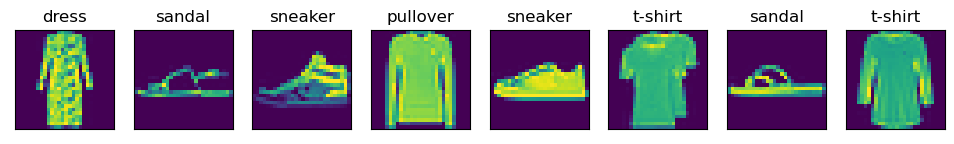

In [17]:
from toolbox.base_models import *
from toolbox.trainer import *
from toolbox.datamodule import FashionMNIST
import time

data = FashionMNIST()
(data.train)[0] #first tuple (sample, label) in the dataset
(data.train)[0][0].shape #the image size
X, y = next(iter(data.get_dataloader(train = True))) #first batch in form of tuple
print(X.shape, X.dtype, y.shape, y.dtype)
data.visualize([X,y])

In [16]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'3.32 sec'

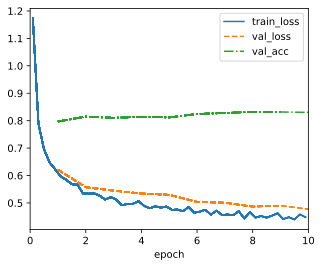

In [1]:
from toolbox.base_models import *
from toolbox.trainer import *
from toolbox.datamodule import FashionMNIST

data = FashionMNIST(batch_size=256, resize = (28,28))
input_dim = 28*28 #number of pixels, so of weights (rows of W and columns of X), each connected to every output
output_dim = 10 #number of classes
model = SoftmaxRegressionScratch(input_dim, output_dim=10, lr=0.1)
trainer = Trainer(max_epochs=20)
trainer.fit(model, data)

Once we fit our model to the training data, we can make some predictions on the test data

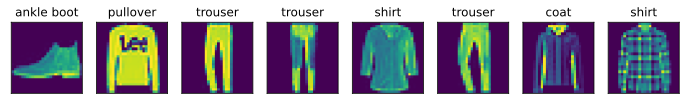

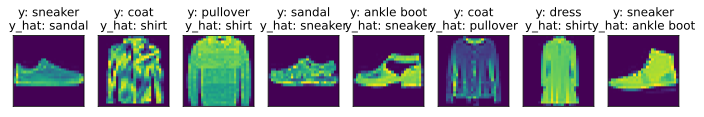

In [23]:
X, y = next(iter(data.val_dataloader()))
predictions = model(X).argmax(axis=1)
data.visualize([X,y])
wrong = predictions.type(y.dtype) != y #We are though interested in the wrongly labeled examples
X, y, predictions = X[wrong], y[wrong], predictions[wrong]
labels = ["y: " + a +'\n'+ "y_hat: " + b for a, b in zip(data.text_labels(y), data.text_labels(predictions))]
data.visualize([X, y], labels = labels)

In [1]:
from toolbox.base_models import *
from toolbox.trainer import *
from toolbox.datamodule import FashionMNIST

data = FashionMNIST(batch_size=256)
model = SoftmaxRegression(input_dim = 784, output_dim = 10, lr=0.1)
trainer = Trainer(max_epochs=10)
trainer.fit(model, data)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (7168x28 and 784x10)